<a href="https://colab.research.google.com/github/Neha-Garg2/EDA-Python/blob/main/EDA_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/datagovbldgrexus_1.csv")
data.head()

,Location Code,Region Code,Bldg Address1,Bldg Address2,Bldg City,Bldg County,Bldg State,Bldg Zip,Congressional District,Bldg Status,Property Type,Bldg ANSI Usable,Total Parking Spaces,Owned/Leased,Construction Date,Historical Type,Historical Status,ABA Accessibility Flag
0,CT0013,1,135 HIGH ST,,HARTFORD,HARTFORD,CT,61031125,1,ACTIVE,BUILDING,97072,29,OWNED,1-Jan-33,Field Not In Use,National Register Listed,Will Conform
1,CT0024,1,141 CHURCH ST,U.S. COURTHOUSE,NEW HAVEN,NEW HAVEN,CT,65102001,3,ACTIVE,BUILDING,69037,0,OWNED,1-Jan-19,Field Not In Use,National Register Listed,Will Conform
2,CT0047,1,135 GRAND ST,,WATERBURY,NEW HAVEN,CT,67029998,5,ACTIVE,BUILDING,7442,2,LEASED,1-Jan-33,Field Not In Use,National Register Listed,Will Conform
3,CT0049,1,919 MAIN STREET,,WILLIMANTIC,WINDHAM,CT,62269998,2,ACTIVE,BUILDING,198,0,LEASED,1-Jan-11,Field Not In Use,Not Evaluated,Will Conform
4,CT0053,1,450 MAIN ST,,HARTFORD,HARTFORD,CT,61033022,1,ACTIVE,BUILDING,203358,103,OWNED,1-Jan-63,Field Not In Use,Evaluated - Not Historic,Will Conform


In [ ]:
data.columns

Index(['Location Code', 'Region Code', 'Bldg Address1', 'Bldg Address2',
       'Bldg City', 'Bldg County', 'Bldg State', 'Bldg Zip',
       'Congressional District', 'Bldg Status', 'Property Type',
       'Bldg ANSI Usable', 'Total Parking Spaces', 'Owned/Leased',
       'Construction Date', 'Historical Type', 'Historical Status',
       'ABA Accessibility Flag '],
      dtype='object')

In [ ]:
data['Bldg Status'].value_counts()

ACTIVE            9111
EXCESS              76
DECOMMISSIONED      13
Name: Bldg Status, dtype: int64

**Distribution owned/leased**

<BarContainer object of 9200 artists>

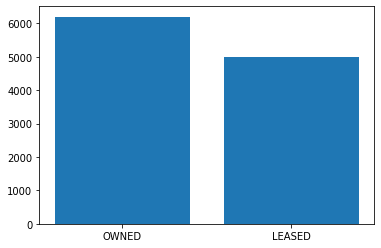

In [ ]:
plt.bar(data['Owned/Leased'],data['Total Parking Spaces'])

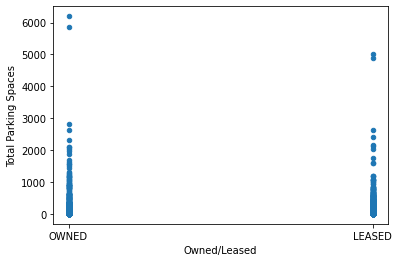

In [ ]:
data.plot.scatter(x='Owned/Leased', y='Total Parking Spaces')

In [ ]:
own_lease = pd.pivot_table(data,index='Owned/Leased' , values='Total Parking Spaces',aggfunc='count')
own_lease

,Total Parking Spaces
Owned/Leased,
LEASED,7054
OWNED,2146


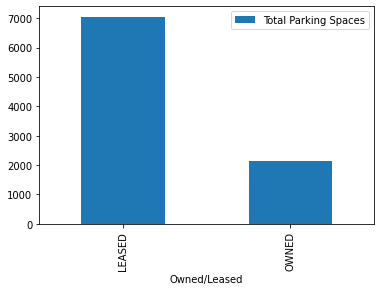

In [ ]:
own_lease.plot(kind='bar')

**In which bldg state parking is excess?**

In [ ]:
excess = pd.pivot_table(data,index='Bldg State',columns='Bldg Status',values='Total Parking Spaces')
excess

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AK,29.495238,NaN,NaN
AL,62.488189,NaN,NaN
AR,35.914634,NaN,NaN
AS,6.800000,NaN,NaN
AZ,32.890909,NaN,NaN
CA,61.909465,NaN,58.846154
CO,76.521930,0.000000,2.000000
CT,29.033898,NaN,NaN
DC,42.654008,NaN,0.000000


In [ ]:
excess=excess[excess.EXCESS>0]
excess

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
CA,61.909465,NaN,58.846154
CO,76.521930,0.0,2.000000
IL,45.497797,NaN,4.200000
LA,47.562044,NaN,6.727273
MN,43.093750,NaN,28.000000
NH,38.000000,NaN,136.000000
NJ,33.430769,NaN,1.555556


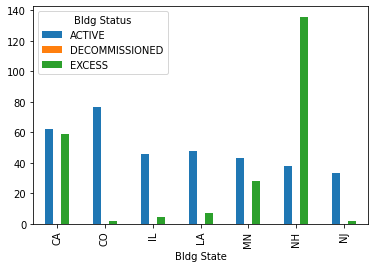

In [ ]:
excess.plot(kind='bar')

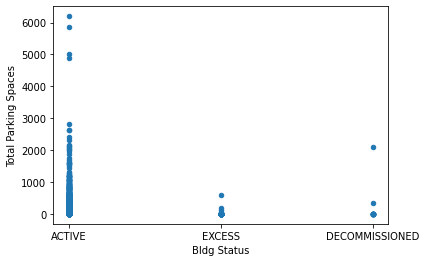

In [ ]:
data.plot.scatter(x='Bldg Status', y='Total Parking Spaces')

<BarContainer object of 7 artists>

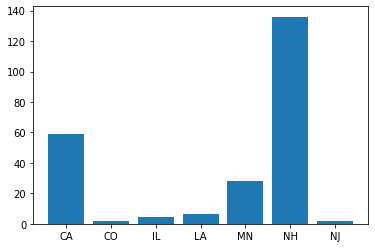

In [ ]:
plt.bar(excess.index,excess.EXCESS)

In [ ]:
excess_sort = excess.EXCESS.sort_values(ascending= False)
excess_sort

Bldg State
NH    136.000000
CA     58.846154
MN     28.000000
LA      6.727273
IL      4.200000
CO      2.000000
NJ      1.555556
Name: EXCESS, dtype: float64

<BarContainer object of 7 artists>

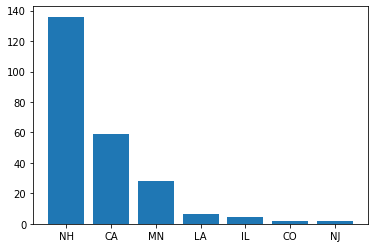

In [ ]:
plt.bar(excess_sort.index,excess_sort.values)

**In which property type parking is excess**

In [ ]:
excess_property = pd.pivot_table(data[data['Bldg Status']=='EXCESS'],index='Property Type',values='Total Parking Spaces')
excess_property

,Total Parking Spaces
Property Type,
BUILDING,12.041667
LAND,0.000000
STRUCTURE,58.333333


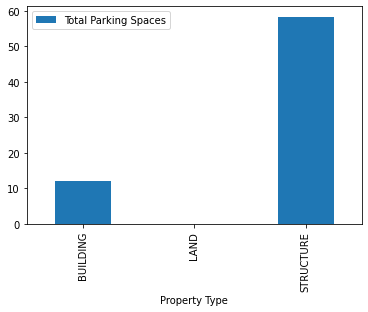

In [ ]:
excess_property.plot(kind='bar')

**Where is more active parking-owned/leased**

In [ ]:
active_parking = pd.pivot_table(data[data['Bldg Status']=='ACTIVE'],index='Owned/Leased',values='Total Parking Spaces')
active_parking

,Total Parking Spaces
Owned/Leased,
LEASED,44.977885
OWNED,75.630530


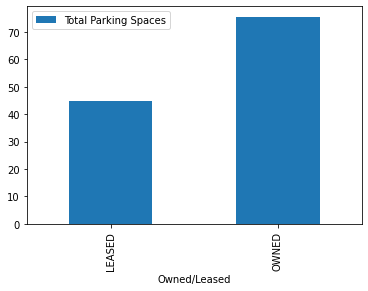

In [ ]:
active_parking.plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8431aebe10>,
      dtype=object)

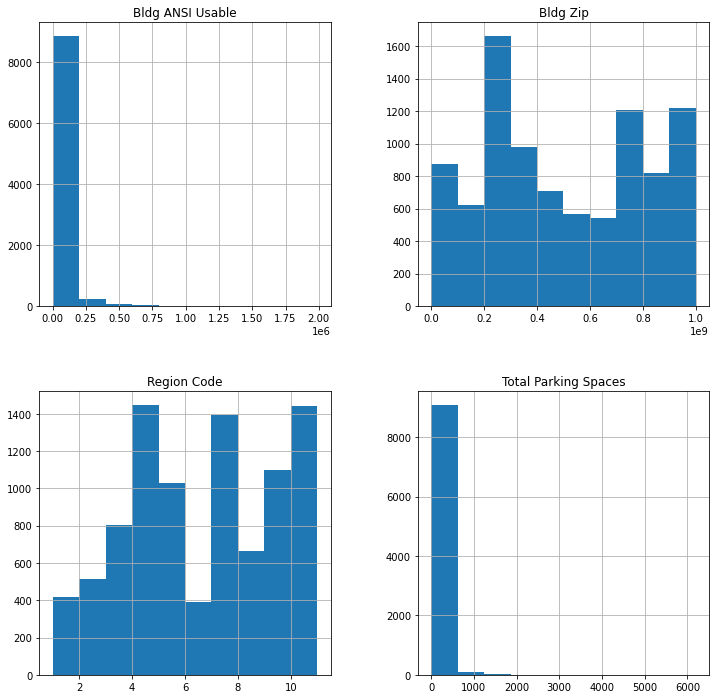

In [ ]:
data.hist(figsize=[12,12])